In [1]:
# All the life cycle in a datascience project
# Data Analysis
# Exploratory data analysis
# Feature Engineering
# Feature Selection
# Model Building
# Model Deployment

In [2]:
##Data Analysis Phase
##Main aim is to understand the data
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import glob

%matplotlib inline

import os
##Display all the columns of the dataframe
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
# !unzip mangrove_data.zip

In [5]:
os.chdir("/content/drive/MyDrive/")

In [6]:
pizza_sales_df = pd.read_excel("Pizza Sales.xlsx")
pizza_sales_df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [7]:
print("shape of pizza_sales_df:", pizza_sales_df.shape)
print("dataframe columns:", pizza_sales_df.columns.to_list())

shape of pizza_sales_df: (48620, 12)
dataframe columns: ['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date', 'order_time', 'unit_price', 'total_price', 'pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']


In [8]:
pizza_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [9]:
#additional check for missing values
pizza_sales_df.isnull().sum() #no missing values was detected

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [10]:
#check for duplicates
duplicates = pizza_sales_df.duplicated()
duplicate_rows = pizza_sales_df[duplicates]
len(duplicate_rows) #no duplicate rows was detected
# df_no_redundancy = df.drop_duplicates()


0

#Informations de base :
## Combien de pizzas uniques (pizza_id distincts) y a-t-il dans le jeu dedonnées ?

In [11]:
# Number of unique pizzas
unique_pizzas = pizza_sales_df['pizza_id'].nunique()
print("Number of unique pizzas:", unique_pizzas)# we have 91 unique pizzas comprising of various sizes, lets dig in and make sure there are no typos

Number of unique pizzas: 91


In [12]:
pizza_unique_vc = pizza_sales_df["pizza_id"].value_counts().sort_index()
print(pizza_unique_vc.head()) #no typos or mispelling detected using head and tail for further exploration

bbq_ckn_l        967
bbq_ckn_m        926
bbq_ckn_s        479
big_meat_s      1811
brie_carre_s     480
Name: pizza_id, dtype: int64


In [13]:
#no of unique pizza's without sizes
#lets split up using the underscore delimiter(_)
pizza_unique_vc_wid = pizza_sales_df["pizza_id"].str.split("_").str[:-1].str.join('_')

In [14]:
pizza_unique_vc_wid.value_counts().sort_index()

bbq_ckn         2372
big_meat        1811
brie_carre       480
calabrese        927
cali_ckn        2302
ckn_alfredo      980
ckn_pesto        961
classic_dlx     2416
five_cheese     1359
four_cheese     1850
green_garden     987
hawaiian        2370
ital_cpcllo     1414
ital_supr       1849
ital_veggie      975
mediterraneo     923
mexicana        1456
napolitana      1451
pep_msh_pep     1342
pepperoni       2369
peppr_salami    1422
prsc_argla      1428
sicilian        1887
soppressata      957
southw_ckn      1885
spicy_ital      1887
spin_pesto       957
spinach_fet     1432
spinach_supr     940
thai_ckn        2315
the_greek       1406
veggie_veg      1510
Name: pizza_id, dtype: int64

In [15]:
len(pizza_unique_vc_wid.unique()) # there are 32 unique pizza without the sizes been taken into consideration

32

##b. Combien de commandes uniques (order_id distincts) figurent dans le jeude données ?

In [16]:
unique_orders = pizza_sales_df['order_id'].nunique()
print("Number of unique orders:", unique_orders)

Number of unique orders: 21350


In [17]:
# Discover the range of unique values
min_value = pizza_sales_df['order_id'].min()
max_value = pizza_sales_df['order_id'].max()

# Print the range of unique values
print(f"Range of unique values: {min_value} to {max_value}")

Range of unique values: 1 to 21350


#3. Analyse temporelle :
## a. Quelle est la plage de dates dans le jeu de données ?

In [18]:
min_order_date = pizza_sales_df['order_date'].min()
max_order_date = pizza_sales_df['order_date'].max()

print("Earliest order date:", min_order_date)
print("Latest order date:", max_order_date)

Earliest order date: 2015-01-01 00:00:00
Latest order date: 2015-12-31 00:00:00


## b. Combien de commandes ont été passées chaque jour ?


In [19]:
# Counting the number of unique orders placed each day
orders_per_day = pizza_sales_df.groupby('order_date')['order_id'].nunique()
print(orders_per_day.head())

order_date
2015-01-01    69
2015-01-02    67
2015-01-03    66
2015-01-04    52
2015-01-05    54
Name: order_id, dtype: int64


##c. Quelle est la durée moyenne pour traiter une commande ?

###To calculate the average processing time for an order, we need to first determine the processing time for each order. However, it appears that the dataset does not directly provide the processing time or completion time for each order.

###In order to calculate processing time, we typically need both the order placement time and the order completion time. If the dataset includes these timestamps, we can subtract the order placement time from the completion time to get the processing time for each order. With the current dataset, it's not possible to calculate the average processing time for an order.

#4. Analyse de la quantité :
##a. Quelle est la quantité moyenne de pizzas commandées ?

In [20]:
# Calculating the average quantity of pizzas ordered
average_pizza_quantity = pizza_sales_df['quantity'].mean()

print("Average quantity of pizzas ordered per order:", round(average_pizza_quantity),2)


Average quantity of pizzas ordered per order: 1 2


In [21]:
# Finding the most frequently ordered pizza size
most_frequent_pizza_size = pizza_sales_df['pizza_size'].mode()
print("Most frequently ordered pizza size:", most_frequent_pizza_size)

#The most frequently ordered pizza size in the dataset is size 'L' (Large).

Most frequently ordered pizza size: 0    L
Name: pizza_size, dtype: object


In [22]:
# Finding the most frequently ordered pizza category
most_frequent_pizza_category = pizza_sales_df['pizza_category'].mode()[0]
print("Most frequently ordered pizza category:", most_frequent_pizza_category)


Most frequently ordered pizza category: Classic


#5. Analyse des prix :
##a. Quel est le prix unitaire moyen des pizzas ?

In [23]:
# Calculating the average unit price of pizzas
average_unit_price = pizza_sales_df['unit_price'].mean()
average_unit_price_rounded = round(average_unit_price, 2)

print("Average unit price of pizzas:", average_unit_price_rounded)


Average unit price of pizzas: 16.49


##b. Quel est le prix total moyen d'une commande ?

In [24]:
# Calculating the average total price per order
# Summing the total prices for each order

total_price_per_order = pizza_sales_df.groupby('order_id')['total_price'].sum()
# Calculating the average of these total prices
average_total_price_per_order = total_price_per_order.mean()
average_total_price_per_order_rounded = round(average_total_price_per_order, 2)
print("Average total price of an order:", average_total_price_per_order_rounded)

Average total price of an order: 38.31


##c. Quelle pizza a le prix unitaire le plus élevé ?

In [25]:
# Finding the pizza(s) with the highest unit price
highest_unit_price_pizza = pizza_sales_df[pizza_sales_df['unit_price'] == pizza_sales_df['unit_price'].max()]
print(highest_unit_price_pizza[['pizza_name', 'unit_price']])


            pizza_name  unit_price
3447   The Greek Pizza       35.95
3563   The Greek Pizza       35.95
5901   The Greek Pizza       35.95
6365   The Greek Pizza       35.95
7490   The Greek Pizza       35.95
9844   The Greek Pizza       35.95
10282  The Greek Pizza       35.95
10875  The Greek Pizza       35.95
13511  The Greek Pizza       35.95
13779  The Greek Pizza       35.95
14029  The Greek Pizza       35.95
15330  The Greek Pizza       35.95
17114  The Greek Pizza       35.95
19441  The Greek Pizza       35.95
20497  The Greek Pizza       35.95
22903  The Greek Pizza       35.95
23298  The Greek Pizza       35.95
30207  The Greek Pizza       35.95
32199  The Greek Pizza       35.95
35953  The Greek Pizza       35.95
36037  The Greek Pizza       35.95
36507  The Greek Pizza       35.95
37943  The Greek Pizza       35.95
39732  The Greek Pizza       35.95
41182  The Greek Pizza       35.95
42717  The Greek Pizza       35.95
43040  The Greek Pizza       35.95
47489  The Greek Piz

In [26]:
# Finding a single instance of the pizza with the highest unit price
highest_unit_price_pizza_single = highest_unit_price_pizza[['pizza_name', 'unit_price']].drop_duplicates().iloc[0]
print(highest_unit_price_pizza_single)

pizza_name    The Greek Pizza
unit_price              35.95
Name: 3447, dtype: object


#6. Répartition par taille et catégorie :
##a. Combien de pizzas de chaque taille ont été vendues ?

In [27]:
# Counting the number of pizzas sold for each size
pizzas_by_size = pizza_sales_df.groupby('pizza_size')['quantity'].sum()
print(pizzas_by_size)


pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64


In [28]:
pizzas_by_size

pizza_size
L      18956
M      15635
S      14403
XL       552
XXL       28
Name: quantity, dtype: int64

##b. Combien de pizzas y a-t-il dans chaque catégorie ?

In [29]:
# Counting the number of pizzas in each category
pizzas_by_category = pizza_sales_df.groupby('pizza_category')['quantity'].sum()
print(pizzas_by_category)


pizza_category
Chicken    11050
Classic    14888
Supreme    11987
Veggie     11649
Name: quantity, dtype: int64


#7. Analyse des ingrédients :
##a. Quels sont les ingrédients les plus couramment utilisés dans toutes les pizzas ?

In [30]:
from collections import Counter

# Splitting the ingredients and counting their occurrences
ingredient_counts = Counter()
pizza_sales_df['pizza_ingredients'].str.split(',').apply(ingredient_counts.update)

# Getting the most common ingredients
most_common_ingredients = ingredient_counts.most_common()
print(most_common_ingredients)

[(' Garlic', 27422), (' Tomatoes', 23694), (' Red Onions', 19547), (' Red Peppers', 16284), ('Chicken', 8443), (' Mushrooms', 8114), (' Mozzarella Cheese', 6605), (' Pepperoni', 6542), (' Green Olives', 6174), (' Artichokes', 5682), (' Jalapeno Peppers', 5643), ('Spinach', 5239), (' Green Peppers', 5224), (' Spinach', 4773), (' Feta Cheese', 4748), (' Pineapple', 4685), ('Pepperoni', 3758), ('Mozzarella Cheese', 3728), (' Asiago Cheese', 3342), (' Cilantro', 3341), (' Corn', 3341), (' Chipotle Sauce', 3341), ('Capocollo', 3301), (' Goat Cheese', 3301), (' Capocollo', 3271), (' Fontina Cheese', 3259), ('Tomatoes', 2907), (' Pesto Sauce', 2893), (' Zucchini', 2485), (' Bacon', 2416), ('Barbecued Chicken', 2372), (' Barbecue Sauce', 2372), ('Sliced Ham', 2370), (' Thai Sweet Chilli Sauce', 2315), (' Artichoke', 2302), (' Gouda Cheese', 2302), (' Peperoncini verdi', 1887), ('Coarse Sicilian Salami', 1887), (' Luganega Sausage', 1887), (' Onions', 1887), (' Sun-dried Tomatoes', 1880), (' Ka

##b. Combien de pizzas contiennent un ingrédient spécifique (par exemple,pepperoni, champignons) ?

In [31]:
# Counting the number of pizzas that contain 'Pepperoni' and 'Mushrooms'
pepperoni_pizzas_count = pizza_sales_df[pizza_sales_df['pizza_ingredients'].str.contains('Pepperoni', case=False, na=False)]['quantity'].sum()
mushrooms_pizzas_count = pizza_sales_df[pizza_sales_df['pizza_ingredients'].str.contains('Mushrooms', case=False, na=False)]['quantity'].sum()

print("Number of pizzas with Pepperoni:", pepperoni_pizzas_count)
print("Number of pizzas with Mushrooms:", mushrooms_pizzas_count)


Number of pizzas with Pepperoni: 10540
Number of pizzas with Mushrooms: 9729


In [32]:
# List of ingredients to check
ingredients = ["Pepperoni", "Mushrooms", "Garlic", "Tomatoes", "Red Onions",
               "Red Peppers", "Mozzarella Cheese", "Spinach", "Chicken", "Capocollo",
               "Green Olives", "Artichokes", "Jalapeno Peppers", "Green Peppers",
               "Feta Cheese", "Pineapple", "Bacon"]

# Counting pizzas for each ingredient
ingredient_pizza_counts = {ingredient: pizza_sales_df[pizza_sales_df['pizza_ingredients'].str.contains(ingredient, case=False, na=False)]['quantity'].sum() for ingredient in ingredients}
print(ingredient_pizza_counts)


{'Pepperoni': 10540, 'Mushrooms': 9729, 'Garlic': 27913, 'Tomatoes': 27986, 'Red Onions': 19834, 'Red Peppers': 16562, 'Mozzarella Cheese': 10569, 'Spinach': 10166, 'Chicken': 11050, 'Capocollo': 6692, 'Green Olives': 6283, 'Artichokes': 5759, 'Jalapeno Peppers': 5771, 'Green Peppers': 5317, 'Feta Cheese': 4797, 'Pineapple': 4793, 'Bacon': 4367}


#8. Détails de la commande :
##a. Quelle est la répartition du nombre de pizzas par commande ?

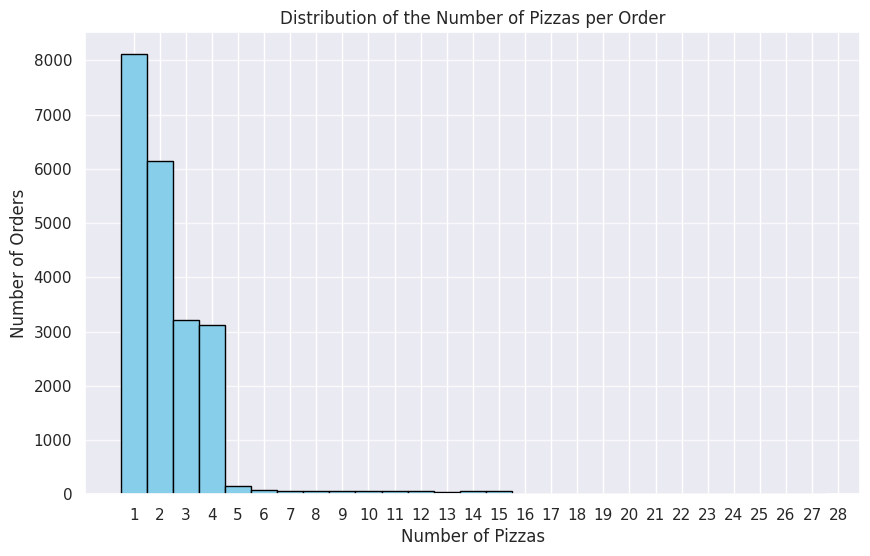

In [33]:
# Grouping by order_id and summing the quantities of pizzas for each order
pizzas_per_order = pizza_sales_df.groupby('order_id')['quantity'].sum()

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(pizzas_per_order, bins=range(1, pizzas_per_order.max() + 1), align='left', color='skyblue', edgecolor='black')
plt.xlabel('Number of Pizzas')
plt.ylabel('Number of Orders')
plt.title('Distribution of the Number of Pizzas per Order')
plt.xticks(range(1, pizzas_per_order.max() + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()


##b. Quelle est la répartition des prix totaux pour les commandes ?

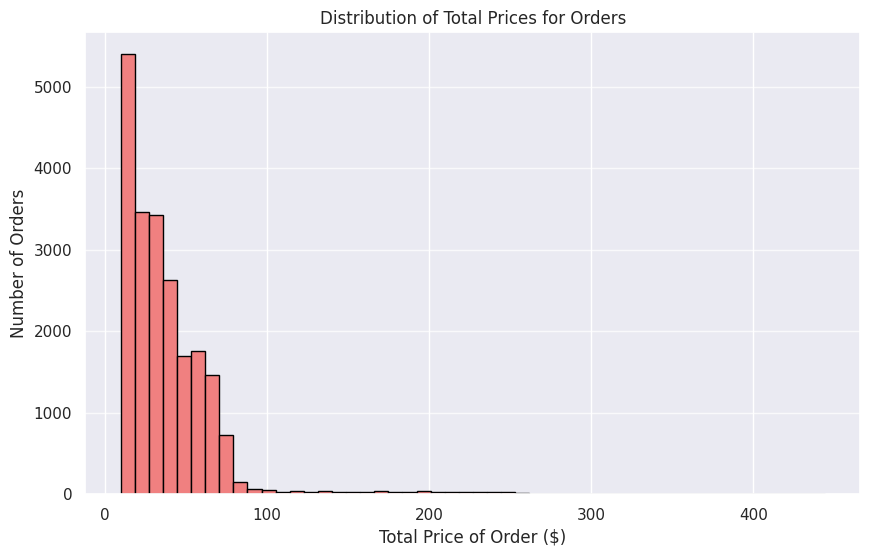

In [34]:
# Calculating the total price for each order
total_price_distribution = pizza_sales_df.groupby('order_id')['total_price'].sum()

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(total_price_distribution, bins=50, color='lightcoral', edgecolor='black')
plt.xlabel('Total Price of Order ($)')
plt.ylabel('Number of Orders')
plt.title('Distribution of Total Prices for Orders')
plt.grid(axis='y', alpha=0.75)
plt.show()
